In [2]:
import pandas as pd
import numpy as np
import pycmap
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import os
import glob
import plotly.express as px

In [3]:
licor_par = pd.read_csv('/Users/ceg/Desktop/kristine/SACNAS-2023-project/licor_hourly_par.csv')
licor_par['datetime'] = pd.DatetimeIndex(licor_par.datetime.values)
licor_par

,Unnamed: 0,datetime,mean_PAR
0,0,2021-11-19 16:00:00+00:00,401.968333
1,1,2021-11-19 17:00:00+00:00,486.087167
2,2,2021-11-19 18:00:00+00:00,891.885167
3,3,2021-11-19 19:00:00+00:00,1092.274333
4,4,2021-11-19 20:00:00+00:00,1002.763667
...,...,...,...
577,577,2021-12-13 17:00:00+00:00,234.544417
578,578,2021-12-13 18:00:00+00:00,688.223000
579,579,2021-12-13 19:00:00+00:00,1092.185333
580,580,2021-12-13 20:00:00+00:00,1320.478000


In [9]:
df = pd.read_csv('Gradients4_TN397_Optics_LISST_ACS_ECO.csv')
df['time'] = pd.DatetimeIndex(df.time.values)
df1 = df.groupby([pd.Grouper(key = 'time', freq = 'H')]).agg({'chla_eco': 'mean'}).reset_index()
g4_chloro = df1[df1['chla_eco'].notnull()]
g4_chloro

,time,chla_eco
0,2021-11-19 17:00:00+00:00,0.234573
1,2021-11-19 18:00:00+00:00,0.163371
2,2021-11-19 19:00:00+00:00,0.107802
3,2021-11-19 20:00:00+00:00,0.146960
4,2021-11-19 21:00:00+00:00,0.139737
...,...,...
593,2021-12-14 10:00:00+00:00,0.115329
594,2021-12-14 11:00:00+00:00,0.107005
595,2021-12-14 12:00:00+00:00,0.100188
596,2021-12-14 13:00:00+00:00,0.116568


In [10]:
merged = pd.merge(licor_par, g4_chloro, left_on = 'datetime', right_on = 'time', how = 'inner')
merged

,Unnamed: 0,datetime,mean_PAR,time,chla_eco
0,1,2021-11-19 17:00:00+00:00,486.087167,2021-11-19 17:00:00+00:00,0.234573
1,2,2021-11-19 18:00:00+00:00,891.885167,2021-11-19 18:00:00+00:00,0.163371
2,3,2021-11-19 19:00:00+00:00,1092.274333,2021-11-19 19:00:00+00:00,0.107802
3,4,2021-11-19 20:00:00+00:00,1002.763667,2021-11-19 20:00:00+00:00,0.146960
4,5,2021-11-19 21:00:00+00:00,922.692167,2021-11-19 21:00:00+00:00,0.139737
...,...,...,...,...,...
526,577,2021-12-13 17:00:00+00:00,234.544417,2021-12-13 17:00:00+00:00,0.103416
527,578,2021-12-13 18:00:00+00:00,688.223000,2021-12-13 18:00:00+00:00,0.077962
528,579,2021-12-13 19:00:00+00:00,1092.185333,2021-12-13 19:00:00+00:00,0.068782
529,580,2021-12-13 20:00:00+00:00,1320.478000,2021-12-13 20:00:00+00:00,0.050990


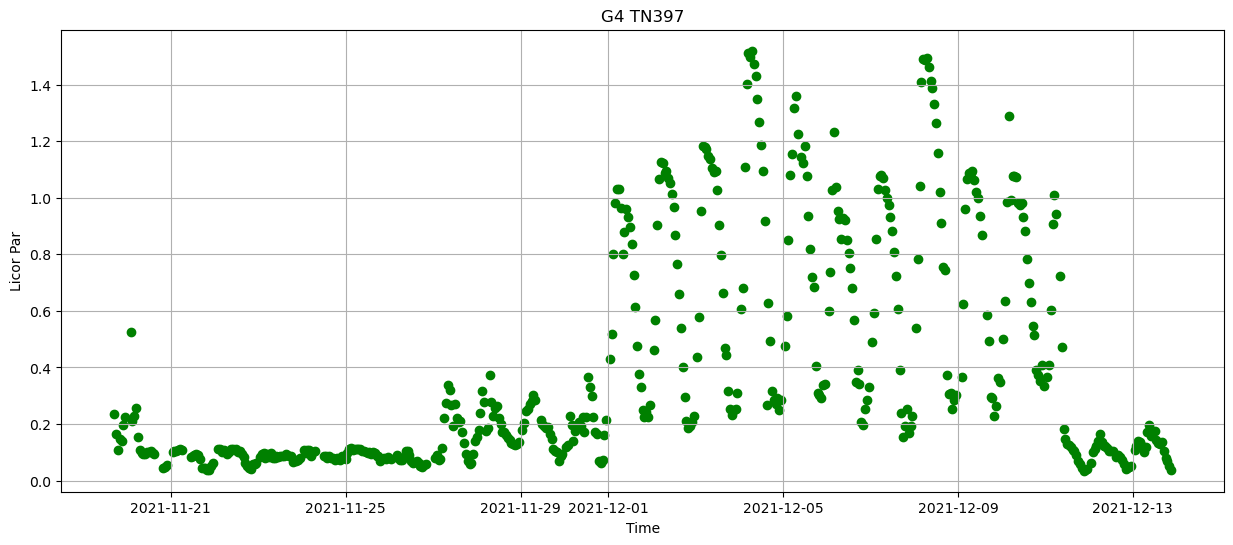

In [15]:
x = merged['time']
y1 = merged['mean_PAR']
y2 = merged['chla_eco']

plt.figure(figsize=(15,6))

#plt.scatter(x, y1, c = 'orange', label = 'PAR')
plt.scatter(x, y2, c = 'green', label = 'Chlorophyll')


plt.xlabel("Time")
plt.ylabel("Licor Par")
plt.title("G4 TN397")
#plt.legend()
plt.grid()

## Plotting hourly licor par and chloro

NameError: name 'mdates' is not defined

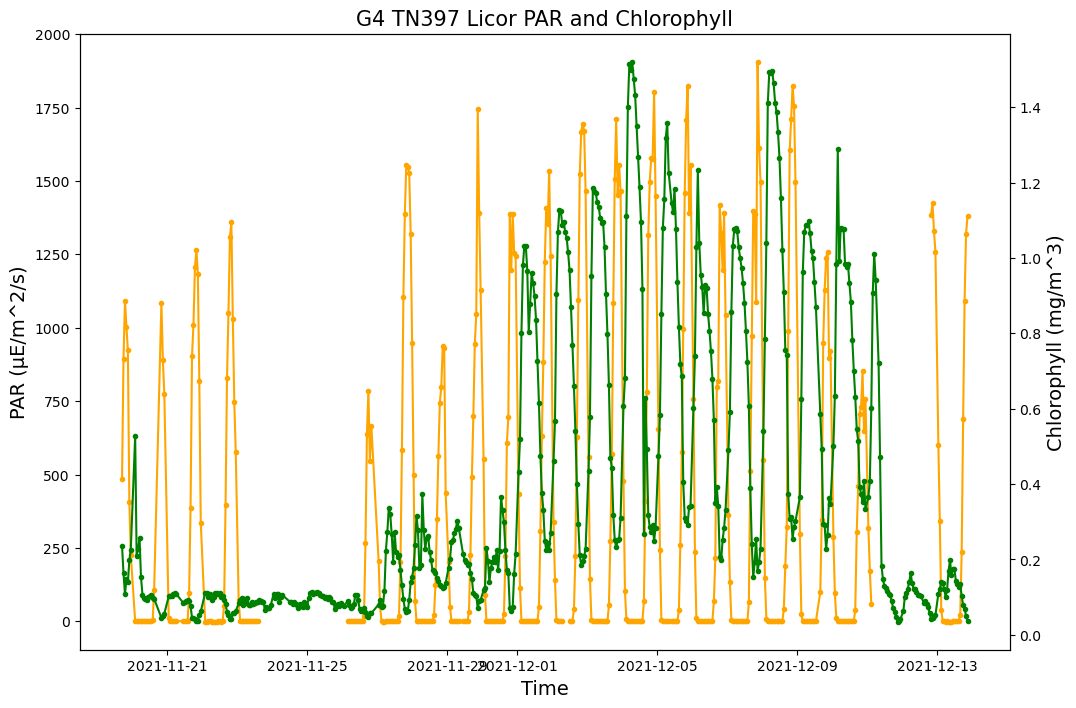

In [17]:
# setting variables
x = merged['time']
y = merged['mean_PAR']
y1 = merged['chla_eco']
# plotting diel cycle from scope_6 for pro only
fig, ax = plt.subplots(sharey = True, sharex = True, nrows = 1, ncols = 1, figsize = (12, 8))
# plots carbon quota data
ax.plot(x, y, c='orange', marker = '.')
# makes secondary axis by sharing the the xaxis and creating yaxis
parax = ax.twinx()
# plots par on shared xaxis
parax.plot(x, y1, c = 'green', marker = '.')
ax.set_xlabel('Time', fontsize = 14)
parax.set_ylabel('Chlorophyll (mg/m^3)', fontsize = 14)
ax.set_ylabel('PAR (μE/m^2/s)', fontsize = 14)
plt.title('G4 TN397 Licor PAR and Chlorophyll', fontsize = 15)

# shortens days into every other day for tick mark labels
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)